In [1]:
import torch

import vcl
import dataset
import coresets
import plots
import importlib
import numpy as np
from models import MultiheadModel

import sys, os

In [37]:
a = np.array([[[0.99722222,        np.nan,        np.nan,        np.nan,        np.nan],
       [0.99722222, 0.89583333,        np.nan,        np.nan,        np.nan],
       [0.99583333, 0.92037037, 0.90313908,        np.nan,        np.nan],
       [0.99583333, 0.88888889, 0.93464245, 0.98449198,        np.nan],
       [0.99694444, 0.8912037 , 0.93327703, 0.98489305, 0.84012605]], 
[[0.95546296,        np.nan,        np.nan,        np.nan,        np.nan],
       [0.97925926, 0.88981481,        np.nan,        np.nan,        np.nan],
       [0.98148148, 0.85416667, 0.81500563,        np.nan,        np.nan],
       [0.98398148, 0.90601852, 0.84123029, 0.98181818,        np.nan],
       [0.98907407, 0.90462963, 0.84376408, 0.98391266, 0.74206349]]])
b = ['Random Coreset Only', 'K-Center Coreset Only']
print(a)

[[[0.99722222        nan        nan        nan        nan]
  [0.99722222 0.89583333        nan        nan        nan]
  [0.99583333 0.92037037 0.90313908        nan        nan]
  [0.99583333 0.88888889 0.93464245 0.98449198        nan]
  [0.99694444 0.8912037  0.93327703 0.98489305 0.84012605]]

 [[0.95546296        nan        nan        nan        nan]
  [0.97925926 0.88981481        nan        nan        nan]
  [0.98148148 0.85416667 0.81500563        nan        nan]
  [0.98398148 0.90601852 0.84123029 0.98181818        nan]
  [0.98907407 0.90462963 0.84376408 0.98391266 0.74206349]]]


In [49]:
np.save("./files/accuracy/3_accs_{fn}".format(fn=dataset_name), c)
np.save("./files/accuracy/3_meths_{fn}".format(fn=dataset_name), d)

In [48]:
c = np.concatenate([data, a], 0); print(c)
d = np.concatenate([methods, b], 0); print(d)

[[[0.99913194        nan        nan        nan        nan]
  [0.99869792 0.98286328        nan        nan        nan]
  [0.99782986 0.98239844 0.99755859        nan        nan]
  [0.99869792 0.96616797 0.99658203 0.99609375        nan]
  [0.99869792 0.92512891 0.98474419 0.99025451 0.98598556]]

 [[0.99956597        nan        nan        nan        nan]
  [0.99913194 0.982875          nan        nan        nan]
  [0.99913194 0.98186328 0.99658203        nan        nan]
  [0.99913194 0.97307422 0.99408108 0.99609375        nan]
  [0.99826389 0.97012109 0.99011528 0.99382853 0.97670822]]

 [[0.9979076         nan        nan        nan        nan]
  [0.99913194 0.98289844        nan        nan        nan]
  [0.99913194 0.98042187 0.99365234        nan        nan]
  [0.99869792 0.97650391 0.99365234 0.99544942        nan]
  [0.99913194 0.97796875 0.99462891 0.99414062 0.98371032]]

 [[0.99913194        nan        nan        nan        nan]
  [0.99913194 0.97941016        nan        nan    

<Figure size 432x288 with 0 Axes>

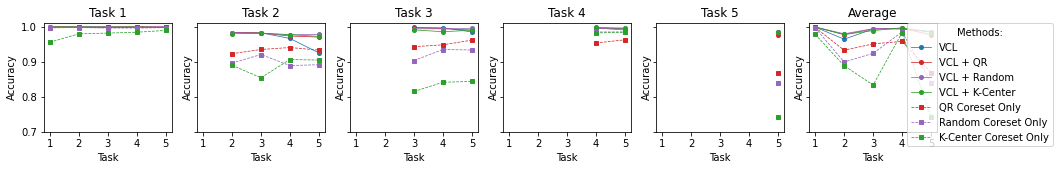

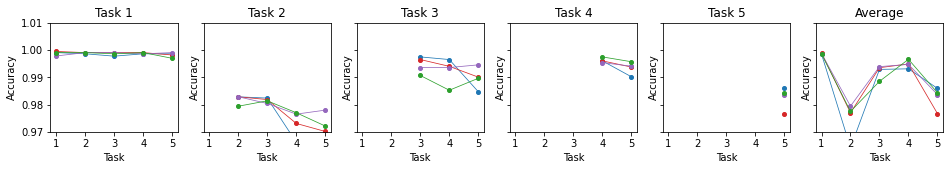

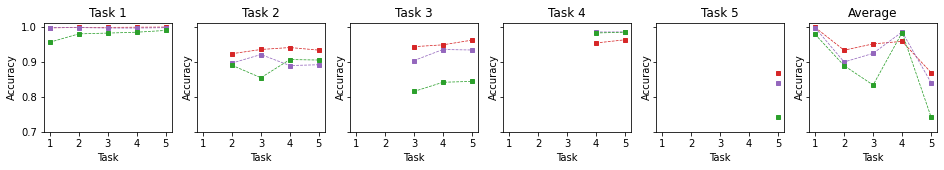

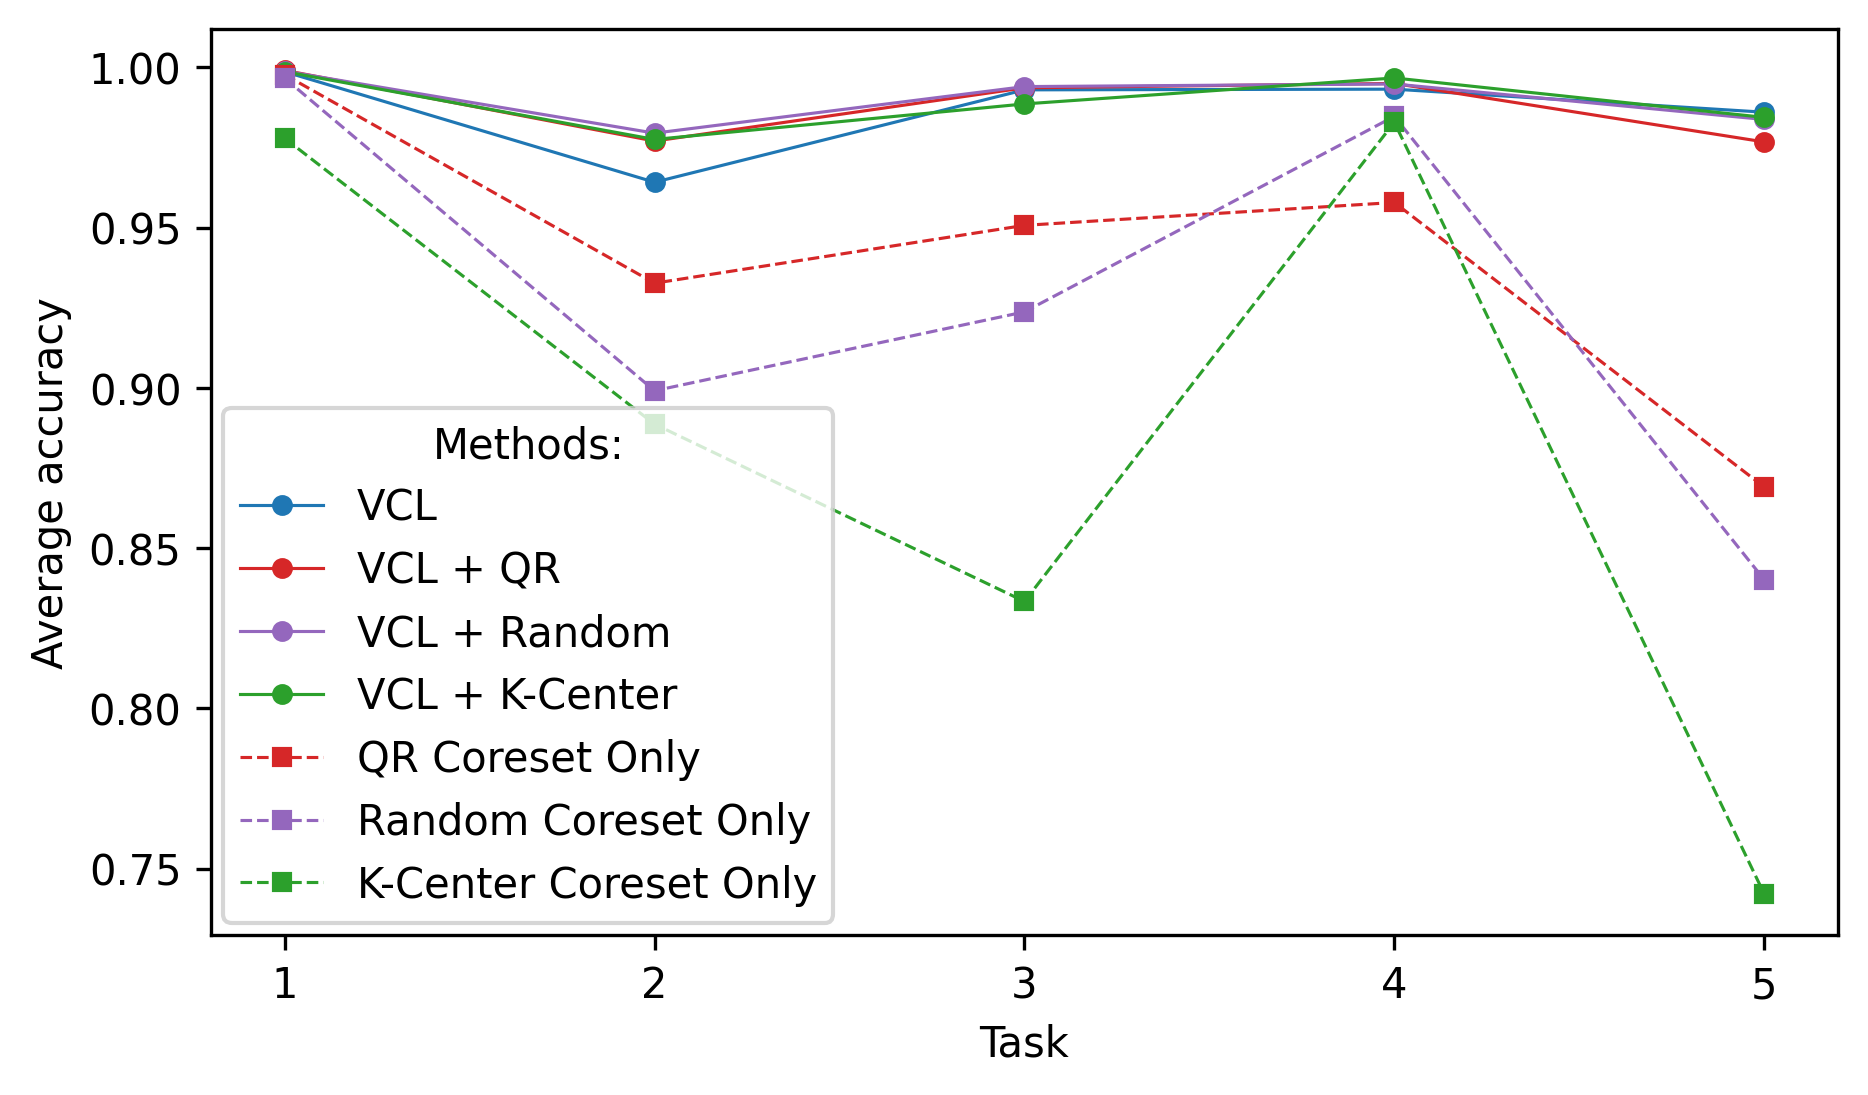

In [52]:
dataset_name="splitMnist"
data = np.load("./files/accuracy/3_accs_{fn}.npy".format(fn=dataset_name))
methods = np.load("./files/accuracy/3_meths_{fn}.npy".format(fn=dataset_name))

plots.three_row_plot_coresets(data, methods, [0.7, 0.97, 0.7])
plots.split_mean_plot(data, methods)

## Run stuff

In [2]:
def run_vanilla_vcl(model, dataloaders, num_tasks, num_epochs, device, beta=0.01):
    coreset_size = 0
    single_head = False
    coreset_method = coresets.attach_random_coreset_split
    all_accs = vcl.run_vcl(num_tasks, single_head, num_epochs, dataloaders,
                model, coreset_method, coreset_size, beta=beta)
    return all_accs

In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

num_tasks = 5
num_epochs = 100
single_head = False
batch_size = 256

class_distribution = [[0, 1],[2, 3],[4, 5],[6, 7],[8, 9]]

dataset_name="splitMnist"
get_dataloader = lambda: dataset.SplitMnistDataloader(class_distribution, batch_size)
get_model = lambda: MultiheadModel(28*28).to(device)

In [4]:

data = []; methods = []

# # Vanilla VCL - no coreset
dataloaders = get_dataloader(); model = get_model()
all_accs = run_vanilla_vcl(model, dataloaders, num_tasks, num_epochs, device)
data.append(all_accs); methods.append("VCL")

np.save("./files/accuracy/2_accs_{fn}".format(fn=dataset_name), data)
np.save("./files/accuracy/2_meths_{fn}".format(fn=dataset_name), methods)

# QR Coreset VCL
coreset_size = 40
coreset_method = coresets.attach_qr_coreset_split

model = get_model(); dataloaders = get_dataloader()
all_accs = vcl.run_vcl(num_tasks, single_head, num_epochs, dataloaders,
            model, coreset_method, coreset_size, beta=0.01)
data.append(all_accs); methods.append("VCL + QR")

np.save("./files/accuracy/2_accs_{fn}".format(fn=dataset_name), data)
np.save("./files/accuracy/2_meths_{fn}".format(fn=dataset_name), methods)


# # Random Coreset VCL
coreset_size = 40
coreset_method = coresets.attach_random_coreset_split

model = get_model(); dataloaders = get_dataloader()
all_accs = vcl.run_vcl(num_tasks, single_head, num_epochs, dataloaders,
            model, coreset_method, coreset_size, beta=0.01)
data.append(all_accs); methods.append("VCL + Random")


# # K-Center Coreset VCL
coreset_size = 40
coreset_method = coresets.attach_kCenter_coreset_split

model = get_model(); dataloaders = get_dataloader()
all_accs = vcl.run_vcl(num_tasks, single_head, num_epochs, dataloaders,
            model, coreset_method, coreset_size, beta=0.01)
data.append(all_accs); methods.append("VCL + K-Center")

np.save("./files/accuracy/2_accs_{fn}".format(fn=dataset_name), data)
np.save("./files/accuracy/2_meths_{fn}".format(fn=dataset_name), methods)
plots.split_plot(data, methods)


c:\Users\Dell 5520\Downloads\10\dataset.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset.targets = torch.tensor(dataset.targets)


Starting Task 1


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [17:29<00:00, 10.25s/it]


Done Training Task 1

Task 1 Accuracy: 0.9991319444444444

Starting Task 2


100%|██████████| 100/100 [16:08<00:00,  9.65s/it]


Done Training Task 2

Task 1 Accuracy: 0.9986979166666666
Task 2 Accuracy: 0.98286328125

Starting Task 3


100%|██████████| 100/100 [15:19<00:00,  9.14s/it]


Done Training Task 3

Task 1 Accuracy: 0.9978298611111112
Task 2 Accuracy: 0.9823984375
Task 3 Accuracy: 0.99755859375

Starting Task 4


100%|██████████| 100/100 [16:24<00:00, 10.17s/it]


Done Training Task 4

Task 1 Accuracy: 0.9986979166666666
Task 2 Accuracy: 0.96616796875
Task 3 Accuracy: 0.99658203125
Task 4 Accuracy: 0.99609375

Starting Task 5


100%|██████████| 100/100 [15:41<00:00,  9.39s/it]


Done Training Task 5

Task 1 Accuracy: 0.9986979166666666
Task 2 Accuracy: 0.92512890625
Task 3 Accuracy: 0.9847441882621951
Task 4 Accuracy: 0.9902545103092784
Task 5 Accuracy: 0.9859855611910995

[[0.99913194        nan        nan        nan        nan]
 [0.99869792 0.98286328        nan        nan        nan]
 [0.99782986 0.98239844 0.99755859        nan        nan]
 [0.99869792 0.96616797 0.99658203 0.99609375        nan]
 [0.99869792 0.92512891 0.98474419 0.99025451 0.98598556]]
Starting Task 1


100%|██████████| 100/100 [16:56<00:00, 10.03s/it]


Done Training Task 1
Replaying Task 1


100%|██████████| 100/100 [00:08<00:00, 11.48it/s]



Task 1 Accuracy: 0.9995659722222222

Starting Task 2


100%|██████████| 100/100 [16:24<00:00,  9.54s/it]


Done Training Task 2
Replaying Task 1


100%|██████████| 100/100 [00:07<00:00, 11.87it/s]


Replaying Task 2


100%|██████████| 100/100 [00:08<00:00, 11.43it/s]



Task 1 Accuracy: 0.9991319444444444
Task 2 Accuracy: 0.9828749999999999

Starting Task 3


100%|██████████| 100/100 [15:07<00:00,  9.43s/it]


Done Training Task 3
Replaying Task 1


100%|██████████| 100/100 [00:07<00:00, 11.74it/s]


Replaying Task 2


100%|██████████| 100/100 [00:08<00:00, 11.77it/s]


Replaying Task 3


100%|██████████| 100/100 [00:08<00:00, 11.71it/s]



Task 1 Accuracy: 0.9991319444444444
Task 2 Accuracy: 0.98186328125
Task 3 Accuracy: 0.99658203125

Starting Task 4


100%|██████████| 100/100 [16:08<00:00,  9.68s/it]


Done Training Task 4
Replaying Task 1


100%|██████████| 100/100 [00:07<00:00, 13.40it/s]


Replaying Task 2


100%|██████████| 100/100 [00:07<00:00, 13.52it/s]


Replaying Task 3


100%|██████████| 100/100 [00:10<00:00,  9.44it/s]


Replaying Task 4


100%|██████████| 100/100 [00:09<00:00, 10.38it/s]



Task 1 Accuracy: 0.9991319444444444
Task 2 Accuracy: 0.97307421875
Task 3 Accuracy: 0.9940810785060976
Task 4 Accuracy: 0.99609375

Starting Task 5


100%|██████████| 100/100 [15:52<00:00,  9.78s/it]


Done Training Task 5
Replaying Task 1


100%|██████████| 100/100 [00:07<00:00, 12.92it/s]


Replaying Task 2


100%|██████████| 100/100 [00:08<00:00, 12.30it/s]


Replaying Task 3


100%|██████████| 100/100 [00:08<00:00, 12.23it/s]


Replaying Task 4


100%|██████████| 100/100 [00:08<00:00, 12.42it/s]


Replaying Task 5


100%|██████████| 100/100 [00:08<00:00, 12.44it/s]



Task 1 Accuracy: 0.9982638888888888
Task 2 Accuracy: 0.97012109375
Task 3 Accuracy: 0.9901152820121951
Task 4 Accuracy: 0.9938285277061856
Task 5 Accuracy: 0.9767082174410995

[[0.99956597        nan        nan        nan        nan]
 [0.99913194 0.982875          nan        nan        nan]
 [0.99913194 0.98186328 0.99658203        nan        nan]
 [0.99913194 0.97307422 0.99408108 0.99609375        nan]
 [0.99826389 0.97012109 0.99011528 0.99382853 0.97670822]]
Starting Task 1


100%|██████████| 100/100 [16:52<00:00, 10.57s/it]


Done Training Task 1
Replaying Task 1


100%|██████████| 100/100 [00:07<00:00, 12.76it/s]



Task 1 Accuracy: 0.9979075974295191

Starting Task 2


100%|██████████| 100/100 [16:17<00:00,  9.58s/it]


Done Training Task 2
Replaying Task 1


100%|██████████| 100/100 [00:07<00:00, 12.83it/s]


Replaying Task 2


100%|██████████| 100/100 [00:07<00:00, 12.65it/s]



Task 1 Accuracy: 0.9991319444444444
Task 2 Accuracy: 0.9828984375

Starting Task 3


100%|██████████| 100/100 [15:02<00:00,  8.85s/it]


Done Training Task 3
Replaying Task 1


100%|██████████| 100/100 [00:08<00:00, 12.47it/s]


Replaying Task 2


100%|██████████| 100/100 [00:08<00:00, 12.79it/s]


Replaying Task 3


100%|██████████| 100/100 [00:08<00:00, 12.30it/s]



Task 1 Accuracy: 0.9991319444444444
Task 2 Accuracy: 0.980421875
Task 3 Accuracy: 0.99365234375

Starting Task 4


100%|██████████| 100/100 [16:15<00:00,  9.79s/it]


Done Training Task 4
Replaying Task 1


100%|██████████| 100/100 [00:07<00:00, 12.53it/s]


Replaying Task 2


100%|██████████| 100/100 [00:07<00:00, 12.91it/s]


Replaying Task 3


100%|██████████| 100/100 [00:08<00:00, 12.11it/s]


Replaying Task 4


100%|██████████| 100/100 [00:08<00:00, 12.33it/s]



Task 1 Accuracy: 0.9986979166666666
Task 2 Accuracy: 0.97650390625
Task 3 Accuracy: 0.99365234375
Task 4 Accuracy: 0.9954494201030928

Starting Task 5


100%|██████████| 100/100 [15:46<00:00,  9.46s/it]


Done Training Task 5
Replaying Task 1


100%|██████████| 100/100 [00:08<00:00, 12.38it/s]


Replaying Task 2


100%|██████████| 100/100 [00:07<00:00, 10.97it/s]


Replaying Task 3


100%|██████████| 100/100 [00:07<00:00, 12.69it/s]


Replaying Task 4


100%|██████████| 100/100 [00:08<00:00, 12.11it/s]


Replaying Task 5


100%|██████████| 100/100 [00:08<00:00, 13.17it/s]



Task 1 Accuracy: 0.9991319444444444
Task 2 Accuracy: 0.97796875
Task 3 Accuracy: 0.99462890625
Task 4 Accuracy: 0.994140625
Task 5 Accuracy: 0.9837103239528796

[[0.9979076         nan        nan        nan        nan]
 [0.99913194 0.98289844        nan        nan        nan]
 [0.99913194 0.98042187 0.99365234        nan        nan]
 [0.99869792 0.97650391 0.99365234 0.99544942        nan]
 [0.99913194 0.97796875 0.99462891 0.99414062 0.98371032]]
Starting Task 1


100%|██████████| 100/100 [17:11<00:00, 10.03s/it]


Done Training Task 1
Replaying Task 1


100%|██████████| 100/100 [00:08<00:00, 12.27it/s]



Task 1 Accuracy: 0.9991319444444444

Starting Task 2


100%|██████████| 100/100 [16:22<00:00,  9.74s/it]


Done Training Task 2
Replaying Task 1


100%|██████████| 100/100 [00:08<00:00, 10.86it/s]


Replaying Task 2


100%|██████████| 100/100 [00:08<00:00, 11.88it/s]



Task 1 Accuracy: 0.9991319444444444
Task 2 Accuracy: 0.9794101562499999

Starting Task 3


100%|██████████| 100/100 [15:03<00:00,  8.99s/it]


Done Training Task 3
Replaying Task 1


100%|██████████| 100/100 [00:08<00:00, 12.95it/s]


Replaying Task 2


100%|██████████| 100/100 [00:08<00:00, 12.10it/s]


Replaying Task 3


100%|██████████| 100/100 [00:08<00:00, 12.51it/s]



Task 1 Accuracy: 0.9986979166666666
Task 2 Accuracy: 0.9813984375
Task 3 Accuracy: 0.99072265625

Starting Task 4


100%|██████████| 100/100 [16:30<00:00, 10.14s/it]


Done Training Task 4
Replaying Task 1


100%|██████████| 100/100 [00:09<00:00, 11.74it/s]


Replaying Task 2


100%|██████████| 100/100 [00:07<00:00, 12.06it/s]


Replaying Task 3


100%|██████████| 100/100 [00:08<00:00, 12.24it/s]


Replaying Task 4


100%|██████████| 100/100 [00:08<00:00, 12.38it/s]



Task 1 Accuracy: 0.9991319444444444
Task 2 Accuracy: 0.9770156249999999
Task 3 Accuracy: 0.9852920160060976
Task 4 Accuracy: 0.99755859375

Starting Task 5


100%|██████████| 100/100 [15:54<00:00, 10.13s/it]


Done Training Task 5
Replaying Task 1


100%|██████████| 100/100 [00:08<00:00, 12.47it/s]


Replaying Task 2


100%|██████████| 100/100 [00:08<00:00, 13.10it/s]


Replaying Task 3


100%|██████████| 100/100 [00:08<00:00, 12.21it/s]


Replaying Task 4


100%|██████████| 100/100 [00:08<00:00, 12.26it/s]


Replaying Task 5


100%|██████████| 100/100 [00:08<00:00, 12.61it/s]



Task 1 Accuracy: 0.9970395418739635
Task 2 Accuracy: 0.97212109375
Task 3 Accuracy: 0.9896865472560976
Task 4 Accuracy: 0.9957816527061856
Task 5 Accuracy: 0.9843647742146597

[[0.99913194        nan        nan        nan        nan]
 [0.99913194 0.97941016        nan        nan        nan]
 [0.99869792 0.98139844 0.99072266        nan        nan]
 [0.99913194 0.97701562 0.98529202 0.99755859        nan]
 [0.99703954 0.97212109 0.98968655 0.99578165 0.98436477]]


AttributeError: 'list' object has no attribute 'tolist'

In [5]:
print(data)
print(methods)

[array([[0.99913194,        nan,        nan,        nan,        nan],
       [0.99869792, 0.98286328,        nan,        nan,        nan],
       [0.99782986, 0.98239844, 0.99755859,        nan,        nan],
       [0.99869792, 0.96616797, 0.99658203, 0.99609375,        nan],
       [0.99869792, 0.92512891, 0.98474419, 0.99025451, 0.98598556]]), array([[0.99956597,        nan,        nan,        nan,        nan],
       [0.99913194, 0.982875  ,        nan,        nan,        nan],
       [0.99913194, 0.98186328, 0.99658203,        nan,        nan],
       [0.99913194, 0.97307422, 0.99408108, 0.99609375,        nan],
       [0.99826389, 0.97012109, 0.99011528, 0.99382853, 0.97670822]]), array([[0.9979076 ,        nan,        nan,        nan,        nan],
       [0.99913194, 0.98289844,        nan,        nan,        nan],
       [0.99913194, 0.98042187, 0.99365234,        nan,        nan],
       [0.99869792, 0.97650391, 0.99365234, 0.99544942,        nan],
       [0.99913194, 0.9779687

In [6]:
# ############ CORESET ONLY METHODS ###################
batch_size=120
coreset_size=40

# QR Coreset Only
coreset_method = coresets.attach_qr_coreset_split

model = get_model(); dataloaders = get_dataloader()
all_accs = vcl.run_coresetonly(num_tasks, single_head, num_epochs, dataloaders,
            model, coreset_method, coreset_size, beta=0.01)
data.append(all_accs); methods.append("QR Coreset Only")

np.save("./files/accuracy/2_accs_{fn}".format(fn=dataset_name), data)
np.save("./files/accuracy/2_meths_{fn}".format(fn=dataset_name), methods)

# Random Coreset Only

coreset_method = coresets.attach_random_coreset_split

model = get_model(); dataloaders = get_dataloader()
all_accs = vcl.run_coresetonly(num_tasks, single_head, num_epochs, dataloaders,
            model, coreset_method, coreset_size, beta=0.01)
data.append(all_accs); methods.append("Random Coreset Only")

# K-center Coreset Only
coreset_method = coresets.attach_kCenter_coreset_split

model = get_model(); dataloaders = get_dataloader()
all_accs = vcl.run_coresetonly(num_tasks, single_head, num_epochs, dataloaders,
            model, coreset_method, coreset_size, beta=0.01)
data.append(all_accs); methods.append("K-Center Coreset Only")


plots.split_plot(data, methods)

np.save("./files/accuracy/2_accs_{fn}_coresetonly".format(fn=dataset_name), data)
np.save("./files/accuracy/2_meths_{fn}_coreseonly".format(fn=dataset_name), methods)

c:\Users\Dell 5520\Downloads\10\dataset.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset.targets = torch.tensor(dataset.targets)


Starting Task 1
Replaying Task 1


100%|██████████| 100/100 [00:07<00:00, 13.20it/s]


Done Training Coreset 1
Task 1 Accuracy: 0.9962962962962963

Starting Task 2
Replaying Task 1


100%|██████████| 100/100 [00:09<00:00, 10.74it/s]


Done Training Coreset 2
Replaying Task 2


100%|██████████| 100/100 [00:08<00:00, 11.90it/s]


Done Training Coreset 2
Task 1 Accuracy: 0.9976851851851853
Task 2 Accuracy: 0.9226851851851853

Starting Task 3
Replaying Task 1


100%|██████████| 100/100 [00:07<00:00, 12.88it/s]


Done Training Coreset 3
Replaying Task 2


100%|██████████| 100/100 [00:08<00:00, 11.83it/s]


Done Training Coreset 3
Replaying Task 3


100%|██████████| 100/100 [00:08<00:00, 11.47it/s]


Done Training Coreset 3
Task 1 Accuracy: 0.9976851851851853
Task 2 Accuracy: 0.9347222222222223
Task 3 Accuracy: 0.9427224099099099

Starting Task 4
Replaying Task 1


100%|██████████| 100/100 [00:07<00:00, 12.70it/s]


Done Training Coreset 4
Replaying Task 2


100%|██████████| 100/100 [00:09<00:00, 11.41it/s]


Done Training Coreset 4
Replaying Task 3


100%|██████████| 100/100 [00:08<00:00, 11.51it/s]


Done Training Coreset 4
Replaying Task 4


100%|██████████| 100/100 [00:08<00:00, 12.45it/s]


Done Training Coreset 4
Task 1 Accuracy: 0.9981481481481482
Task 2 Accuracy: 0.9402777777777778
Task 3 Accuracy: 0.9479870495495495
Task 4 Accuracy: 0.9532976827094473

Starting Task 5
Replaying Task 1


100%|██████████| 100/100 [00:08<00:00,  9.26it/s]


Done Training Coreset 5
Replaying Task 2


100%|██████████| 100/100 [00:10<00:00,  9.64it/s]


Done Training Coreset 5
Replaying Task 3


100%|██████████| 100/100 [00:09<00:00, 11.04it/s]


Done Training Coreset 5
Replaying Task 4


100%|██████████| 100/100 [00:08<00:00, 11.73it/s]


Done Training Coreset 5
Replaying Task 5


100%|██████████| 100/100 [00:08<00:00, 11.51it/s]


Done Training Coreset 5
Task 1 Accuracy: 0.9986111111111112
Task 2 Accuracy: 0.9328703703703705
Task 3 Accuracy: 0.9613316441441442
Task 4 Accuracy: 0.962344028520499
Task 5 Accuracy: 0.8690476190476192

[[0.9962963         nan        nan        nan        nan]
 [0.99768519 0.92268519        nan        nan        nan]
 [0.99768519 0.93472222 0.94272241        nan        nan]
 [0.99814815 0.94027778 0.94798705 0.95329768        nan]
 [0.99861111 0.93287037 0.96133164 0.96234403 0.86904762]]
Starting Task 1
Replaying Task 1


100%|██████████| 100/100 [00:08<00:00, 12.68it/s]


Done Training Coreset 1
Task 1 Accuracy: 0.9972222222222222

Starting Task 2
Replaying Task 1


100%|██████████| 100/100 [00:07<00:00, 10.21it/s]


Done Training Coreset 2
Replaying Task 2


100%|██████████| 100/100 [00:07<00:00, 12.53it/s]


Done Training Coreset 2
Task 1 Accuracy: 0.9972222222222222
Task 2 Accuracy: 0.8958333333333334

Starting Task 3
Replaying Task 1


100%|██████████| 100/100 [00:07<00:00, 12.73it/s]


Done Training Coreset 3
Replaying Task 2


100%|██████████| 100/100 [00:08<00:00, 11.65it/s]


Done Training Coreset 3
Replaying Task 3


100%|██████████| 100/100 [00:08<00:00, 11.79it/s]


Done Training Coreset 3
Task 1 Accuracy: 0.9958333333333333
Task 2 Accuracy: 0.9203703703703705
Task 3 Accuracy: 0.9031390765765765

Starting Task 4
Replaying Task 1


100%|██████████| 100/100 [00:08<00:00, 11.36it/s]


Done Training Coreset 4
Replaying Task 2


100%|██████████| 100/100 [00:07<00:00, 12.59it/s]


Done Training Coreset 4
Replaying Task 3


100%|██████████| 100/100 [00:07<00:00, 12.76it/s]


Done Training Coreset 4
Replaying Task 4


100%|██████████| 100/100 [00:07<00:00, 12.58it/s]


Done Training Coreset 4
Task 1 Accuracy: 0.9958333333333333
Task 2 Accuracy: 0.8888888888888888
Task 3 Accuracy: 0.934642454954955
Task 4 Accuracy: 0.9844919786096256

Starting Task 5
Replaying Task 1


100%|██████████| 100/100 [00:09<00:00,  8.56it/s]


Done Training Coreset 5
Replaying Task 2


100%|██████████| 100/100 [00:08<00:00, 11.83it/s]


Done Training Coreset 5
Replaying Task 3


100%|██████████| 100/100 [00:08<00:00, 12.02it/s]


Done Training Coreset 5
Replaying Task 4


100%|██████████| 100/100 [00:08<00:00, 11.80it/s]


Done Training Coreset 5
Replaying Task 5


100%|██████████| 100/100 [00:08<00:00, 12.39it/s]


Done Training Coreset 5
Task 1 Accuracy: 0.9969444444444444
Task 2 Accuracy: 0.8912037037037036
Task 3 Accuracy: 0.933277027027027
Task 4 Accuracy: 0.9848930481283424
Task 5 Accuracy: 0.8401260504201681

[[0.99722222        nan        nan        nan        nan]
 [0.99722222 0.89583333        nan        nan        nan]
 [0.99583333 0.92037037 0.90313908        nan        nan]
 [0.99583333 0.88888889 0.93464245 0.98449198        nan]
 [0.99694444 0.8912037  0.93327703 0.98489305 0.84012605]]
Starting Task 1
Replaying Task 1


100%|██████████| 100/100 [00:07<00:00, 12.98it/s]


Done Training Coreset 1
Task 1 Accuracy: 0.955462962962963

Starting Task 2
Replaying Task 1


100%|██████████| 100/100 [00:08<00:00, 12.41it/s]


Done Training Coreset 2
Replaying Task 2


100%|██████████| 100/100 [00:08<00:00, 12.04it/s]


Done Training Coreset 2
Task 1 Accuracy: 0.9792592592592594
Task 2 Accuracy: 0.8898148148148147

Starting Task 3
Replaying Task 1


100%|██████████| 100/100 [00:08<00:00, 12.92it/s]


Done Training Coreset 3
Replaying Task 2


100%|██████████| 100/100 [00:07<00:00, 13.18it/s]


Done Training Coreset 3
Replaying Task 3


100%|██████████| 100/100 [00:07<00:00, 12.67it/s]


Done Training Coreset 3
Task 1 Accuracy: 0.9814814814814815
Task 2 Accuracy: 0.8541666666666665
Task 3 Accuracy: 0.8150056306306306

Starting Task 4
Replaying Task 1


100%|██████████| 100/100 [00:08<00:00, 12.23it/s]


Done Training Coreset 4
Replaying Task 2


100%|██████████| 100/100 [00:08<00:00, 12.86it/s]


Done Training Coreset 4
Replaying Task 3


100%|██████████| 100/100 [00:08<00:00, 12.34it/s]


Done Training Coreset 4
Replaying Task 4


100%|██████████| 100/100 [00:08<00:00, 12.39it/s]


Done Training Coreset 4
Task 1 Accuracy: 0.9839814814814815
Task 2 Accuracy: 0.9060185185185188
Task 3 Accuracy: 0.8412302927927928
Task 4 Accuracy: 0.9818181818181818

Starting Task 5
Replaying Task 1


100%|██████████| 100/100 [00:08<00:00, 11.91it/s]


Done Training Coreset 5
Replaying Task 2


100%|██████████| 100/100 [00:08<00:00, 12.28it/s]


Done Training Coreset 5
Replaying Task 3


100%|██████████| 100/100 [00:08<00:00, 12.78it/s]


Done Training Coreset 5
Replaying Task 4


100%|██████████| 100/100 [00:07<00:00, 12.53it/s]


Done Training Coreset 5
Replaying Task 5


100%|██████████| 100/100 [00:08<00:00, 11.83it/s]


Done Training Coreset 5
Task 1 Accuracy: 0.9890740740740743
Task 2 Accuracy: 0.9046296296296296
Task 3 Accuracy: 0.8437640765765766
Task 4 Accuracy: 0.9839126559714795
Task 5 Accuracy: 0.7420634920634921

[[0.95546296        nan        nan        nan        nan]
 [0.97925926 0.88981481        nan        nan        nan]
 [0.98148148 0.85416667 0.81500563        nan        nan]
 [0.98398148 0.90601852 0.84123029 0.98181818        nan]
 [0.98907407 0.90462963 0.84376408 0.98391266 0.74206349]]


AttributeError: 'list' object has no attribute 'tolist'

print(methods)
print(data)

In [7]:
print(methods)
print(data)

['VCL', 'VCL + QR', 'VCL + Random', 'VCL + K-Center', 'QR Coreset Only', 'Random Coreset Only', 'K-Center Coreset Only']
[array([[0.99913194,        nan,        nan,        nan,        nan],
       [0.99869792, 0.98286328,        nan,        nan,        nan],
       [0.99782986, 0.98239844, 0.99755859,        nan,        nan],
       [0.99869792, 0.96616797, 0.99658203, 0.99609375,        nan],
       [0.99869792, 0.92512891, 0.98474419, 0.99025451, 0.98598556]]), array([[0.99956597,        nan,        nan,        nan,        nan],
       [0.99913194, 0.982875  ,        nan,        nan,        nan],
       [0.99913194, 0.98186328, 0.99658203,        nan,        nan],
       [0.99913194, 0.97307422, 0.99408108, 0.99609375,        nan],
       [0.99826389, 0.97012109, 0.99011528, 0.99382853, 0.97670822]]), array([[0.9979076 ,        nan,        nan,        nan,        nan],
       [0.99913194, 0.98289844,        nan,        nan,        nan],
       [0.99913194, 0.98042187, 0.99365234,   

<Figure size 432x288 with 0 Axes>

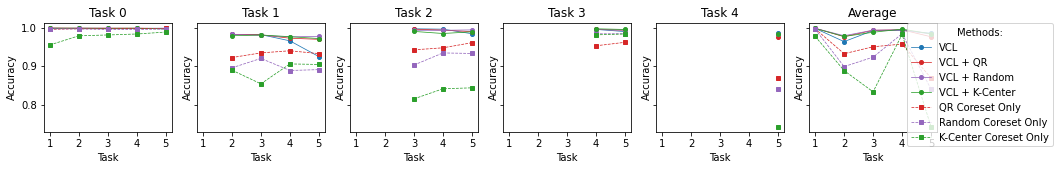

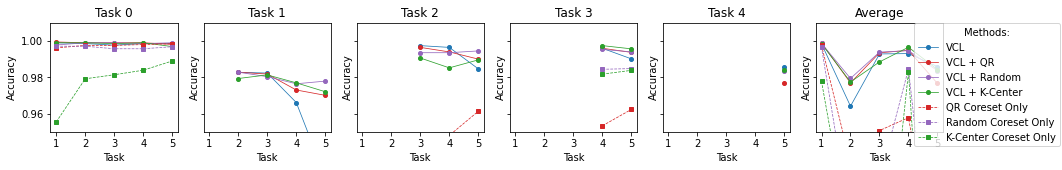

In [36]:
plots.split_plot(data,methods,0.95)

## PLot stuff

In [ ]:
importlib.reload(plots)

<module 'plots' from 'c:\\Users\\Dell 5520\\Downloads\\10\\plots.py'>

In [ ]:
# import plots
# dataset_name="splitMnist"
# data = np.load("files/accuracy/2_accs_{fn}.npy".format(fn=dataset_name))
# methods = np.load("files/accuracy/2_meths_{fn}.npy".format(fn=dataset_name))
# #print(methods)

# #for acc in data:
#     #print(acc)
#     #print(np.nanmean(acc,0))
# plots.split_plot(data, methods, lower_bound=0.5)

SOMETHING IS WRONG WITH THIS

In [ ]:
# D = np.load("files/accuracy/2_accs_{fn}.npy".format(fn=dataset_name))
# M = np.load("files/accuracy/2_meths_{fn}.npy".format(fn=dataset_name))
# print(D)
# dd = []
# for d in D:
#     dd.append(np.nanmean(d,0))
# print(dd)
# plots.single_accuracy_plot(dd, M)